In [1]:
import os
import re
import nltk
import math
import matplotlib.pyplot as plt

In [2]:
def readTxtFile(filePath):
    # read a txt file with the given path
    with open(filePath, 'r', encoding='utf8', errors='ignore') as f:
        txtFile = f.read()
    return txtFile

In [3]:
def writeTxtFile(filePath, text):
    # write into a txt file with the given text
    with open(filePath, 'a', encoding='utf8', errors='ignore') as f:
        # f.truncate(0) # clear the file if it not empty
        f.write(text)

In [4]:
def getStopWordsList():
    # download the NLTK stop-word list
    nltk.download('stopwords') # TODO ask if we can use this library
    stopWords = nltk.corpus.stopwords.words('english')
    for w in range(len(stopWords)):
        # replace the apostrophes to make the list compatible with the corpus
        word = stopWords[w].replace("'", "")
        stopWords[w] = word
    return stopWords

In [5]:
stopWords = getStopWordsList()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gulce\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def getWord2Freq(words):
    word2Freq = {}
    for word in words:
        if word in word2Freq:
            word2Freq[word] += 1
        else:
            word2Freq[word] = 1
    return word2Freq

In [7]:
def getRank2Freq(word2Freq):
    count = 1
    rank2Freq = {}
    sortedFreq = sorted(word2Freq.items(), key=lambda x: x[1], reverse=True)
    for key, value in sortedFreq:
        rank2Freq[count] = value
        count += 1
    return rank2Freq

In [8]:
def tokenize(text):
    # get rid of every punctuation marks via regular expressions
    text = text.replace(r"’", '')
    text = re.sub(r'[^\w\s]|_', ' ', text)
    # cast every word to lowercase
    words = text.lower().split()
    text = ' '.join(words)
    word2Freq = getWord2Freq(words)
    return text, word2Freq

In [9]:
def removeStopWords(text, stopWords):
    words = text.split()
    removedWords = [word for word in words if word not in stopWords]
    removedText = ' '.join(removedWords)
    word2Freq = getWord2Freq(removedWords)
    return removedText, word2Freq

In [10]:
directoryPath = r'Books'
tokenizedPathB = r'TokenizedBooks'
tokenizedPathA = r'TokenizedAuthors'
# tokenizedPathT = r'TokenizedTypes'
stopRemovedPathB = r'StopRemovedBooks'
# stopRemovedPathA = r'StopRemovedAuthors'
# stopRemovedPathT = r'StopRemovedTypes'

In [11]:
tokenizedBookDicts = []
tokenizedAuthorDicts = []
# tokenizedTypeDicts = []
stopRemovedBookDicts = []
# stopRemovedAuthorDicts = []
# stopRemovedTypeDicts = []

In [12]:
authorLabels = []
# typeLabels = []

In [13]:
currentAuthorFreqDictT = {}
# currentAuthorFreqDictS = {}
# currentTypeFreqDictT = {}
# currentTypeFreqDictS = {}

In [14]:
count = 0
for book in os.listdir(directoryPath):
    bookPath = os.path.join(directoryPath, book)
    tokenizedBookPath = os.path.join(tokenizedPathB, book)
    stopRemovedBookPath = os.path.join(stopRemovedPathB, book)

    txtBook = readTxtFile(bookPath)

    tokenizedText, tokenizedWord2Freq = tokenize(txtBook)
    writeTxtFile(tokenizedBookPath, tokenizedText)
    tokenizedBookDicts.append(tokenizedWord2Freq)

    stopRemovedText, stopRemovedWord2Freq = removeStopWords(tokenizedText, stopWords)
    writeTxtFile(stopRemovedBookPath, stopRemovedText)
    stopRemovedBookDicts.append(stopRemovedWord2Freq)

    option = book.split('_')[0]

    if option == 'A':
        authorName = book.split('_')[1]
        tokenizedAuthorPath = os.path.join(tokenizedPathA, authorName)
        # stopRemovedAuthorPath = os.path.join(stopRemovedPathA, authorName)
        writeTxtFile(tokenizedAuthorPath, tokenizedText)
        # writeTxtFile(stopRemovedAuthorPath, tokenizedText)

        currentAuthorFreqDictT = {k: currentAuthorFreqDictT.get(k, 0) + tokenizedWord2Freq.get(k, 0) for k in set(currentAuthorFreqDictT) | set(tokenizedWord2Freq)}
        # currentAuthorFreqDictS = {k: currentAuthorFreqDictS.get(k, 0) + stopRemovedWord2Freq.get(k, 0) for k in set(currentAuthorFreqDictS) | set(stopRemovedWord2Freq)}

        if count % 3 == 0:
            tokenizedAuthorDicts.append(currentAuthorFreqDictT)
            # stopRemovedAuthorDicts.append(currentAuthorFreqDictS)
            authorLabels.append(authorName)
            currentAuthorFreqDictT = {}
            # currentAuthorFreqDictS = {}

    # elif option == 'T':
        # typeName = book.split('_')[1]
        # tokenizedTypePath = os.path.join(tokenizedPathT, typeName)
        # stopRemovedTypePath = os.path.join(stopRemovedPathT, typeName)
        # writeTxtFile(tokenizedTypePath, tokenizedText)
        # writeTxtFile(stopRemovedTypePath, tokenizedText)

        # currentTypeFreqDictT = {k: currentTypeFreqDictT.get(k, 0) + tokenizedWord2Freq.get(k, 0) for k in set(currentTypeFreqDictT) | set(tokenizedWord2Freq)}
        # currentTypeFreqDictS = {k: currentTypeFreqDictS.get(k, 0) + stopRemovedWord2Freq.get(k, 0) for k in set(currentTypeFreqDictS) | set(stopRemovedWord2Freq)}

        # if count % 3 == 0:
            # tokenizedTypeDicts.append(currentTypeFreqDictT)
            # stopRemovedTypeDicts.append(currentTypeFreqDictS)
            # typeLabels.append(typeName)
            # currentTypeFreqDictT = {}
            # currentTypeFreqDictS = {}

    count += 1

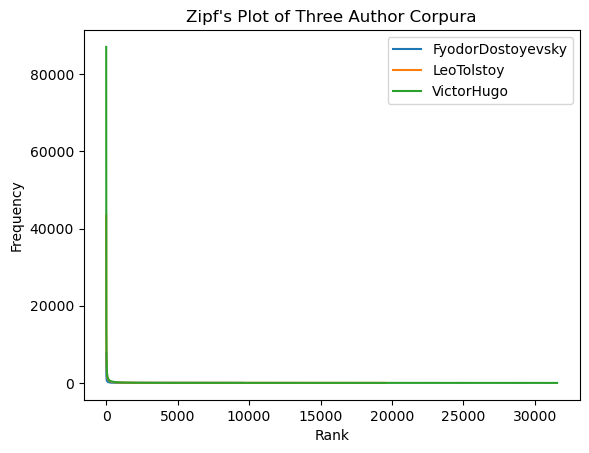

In [15]:
plt.figure()
for a in range(len(tokenizedAuthorDicts)):
    tokenizedAuthorRank2Freq = getRank2Freq(tokenizedAuthorDicts[a])
    xValues = list(tokenizedAuthorRank2Freq.keys())
    yValues = list(tokenizedAuthorRank2Freq.values())
    plt.plot(xValues, yValues, label=authorLabels[a])
plt.legend()
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Plot of Three Author Corpura")
plt.show()

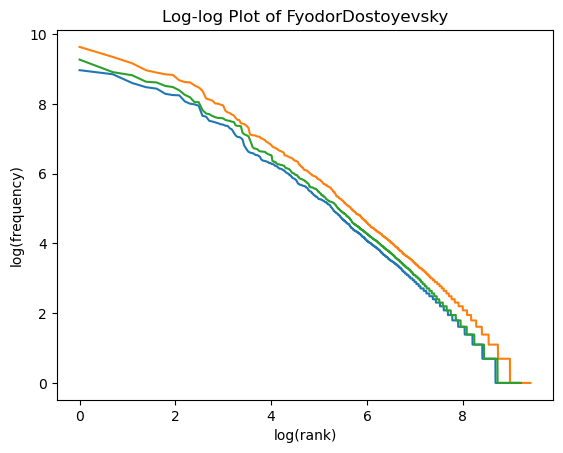

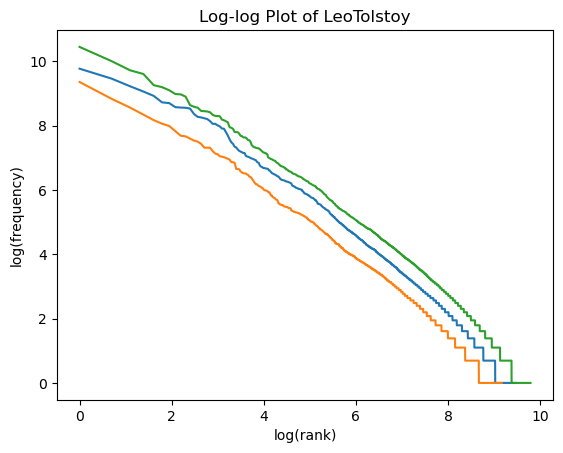

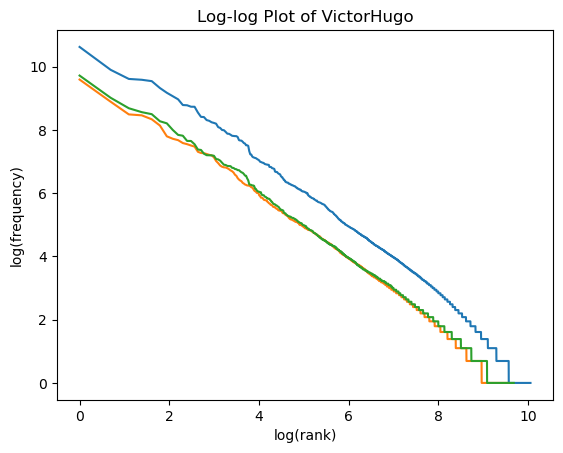

In [18]:
for a in range(int(len(tokenizedBookDicts)/2)):
    if a % 3 == 0:
        plt.figure()
        title = "Log-log Plot of " + str(authorLabels[int(a/3)])
    tokenizedAuthorRank2Freq = getRank2Freq(tokenizedBookDicts[a])
    xValues = list(tokenizedAuthorRank2Freq.keys())
    xValues = [math.log(x) for x in xValues]
    yValues = list(tokenizedAuthorRank2Freq.values())
    yValues = [math.log(y) for y in yValues]
    plt.plot(xValues, yValues)
    plt.xlabel('log(rank)')
    plt.ylabel('log(frequency)')
    plt.title(title)
plt.show()

In [32]:
xValues = []
yValues = []
for author in os.listdir(tokenizedPathA):
    authorPath = os.path.join(tokenizedPathA, author)
    txtAuthor = readTxtFile(authorPath)
    words = txtAuthor.split()
    totalTokenSize = len(words)
    xVals = []
    yVals = []
    for r in range(int(totalTokenSize/5000+1)):
        tokenSize = int(5000*(r+1))
        currentWords = words[0:tokenSize]
        uniqueWords = set(currentWords)
        vocabularySize = len(uniqueWords)
        xVals.append(tokenSize)
        yVals.append(vocabularySize)
    xValues.append(xVals)
    yValues.append(yVals)

Text(0.5, 1.0, 'Normal Plot of Three Author Corpura')

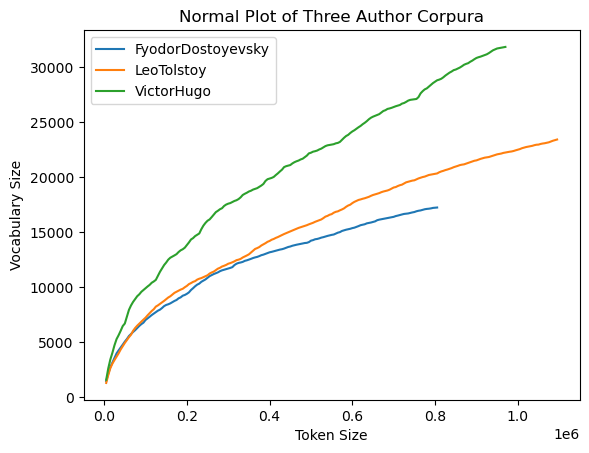

In [35]:
plt.figure()
for a in range(len(xValues)):
    xVals = xValues[a]
    yVals = yValues[a]
    plt.plot(xVals, yVals, label=authorLabels[a])
plt.legend()
plt.xlabel('Token Size')
plt.ylabel('Vocabulary Size')
plt.title("Normal Plot of Three Author Corpura")

Text(0.5, 1.0, 'Log-log Plot of Three Author Corpura')

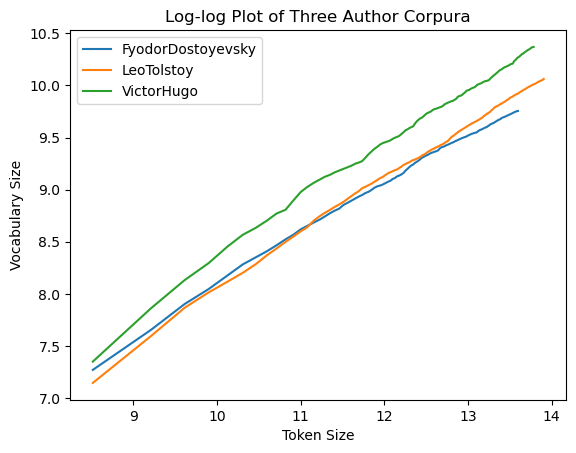

In [36]:
plt.figure()
for a in range(len(xValues)):
    xVals = xValues[a]
    xVals = [math.log(x) for x in xVals]
    yVals = yValues[a]
    yVals = [math.log(y) for y in yVals]
    plt.plot(xVals, yVals, label=authorLabels[a])
plt.legend()
plt.xlabel('Token Size')
plt.ylabel('Vocabulary Size')
plt.title("Log-log Plot of Three Author Corpura")